# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2023**
Grupo 32: 

- Daniel Andres Dos Santos
- Luciana Gramajo
- Natalia Rubio
- Sebastián Coca

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
# Procedemos a leer el conjunto de datos que generamos en el entregable 1.
# Leeremos el archivo dfjoin.csv y lo llamaramos a la dataframe como melb_df
from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo dfjoin.csv en el Google Drive y url del repositorio donde también está albergado
url = 'https://raw.githubusercontent.com/sebascoca/DiploDatos2023/main/AnalisisYCuracion/Practico/dfjoin.csv'
path = '/content/drive/Shared drives/DiploDatos-G32/AEyC/tablafinalAEyC.csv'

# Leer el archivo dfjoin.csv
melb_df = pandas.read_csv(url)
melb_df[:3]

# melb_df = pandas.read_csv(
#     'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
# melb_df = melb_df[['Suburb', 'Rooms', 'Price', 'Distance', 'Postcode', 'BuildingArea', 'YearBuilt', 'Regionname', 'Type']]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,Rooms,Type,Price,Postcode,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,index.1,zipcode,airbnb price mean,airbnb record count,airbnb weekly price_mean,airbnb monthly price mean,Price_log
0,0,2,h,1480000.0,3067.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,57.0,3067.0,130.624031,258.0,605.152174,2187.032258,6.170262
1,1,2,h,1035000.0,3067.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,57.0,3067.0,130.624031,258.0,605.152174,2187.032258,6.014940
2,2,3,h,1465000.0,3067.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,57.0,3067.0,130.624031,258.0,605.152174,2187.032258,6.165838


## Ejercicio 1: Encoding

1. Seleccionamos todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable,salvo `BuildingArea` y `YearBuilt`.

2. Luego, segun lo pedido en este punto aplicamos una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas (para ello, antes, la separamos las variables en estos dos tipos de variables).


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

# Imprimimos las columnas numéricas y categóricas para familiarzarnos con ellas
print(melb_df.select_dtypes(include=['number']).columns.tolist())
print(melb_df.select_dtypes(include=['object']).columns.tolist())

# Generamos una lista con etiquetas de las columnas categóricas,
# las cuales son además de interés según análisis en TP1
categorical_cols = ['Type', 'Regionname']

# Número de valores únicos, o trayectoria de las variables categóricas de interés
melb_df[categorical_cols].nunique()
# Se chequea si hay entradas nulas
melb_df[categorical_cols].isna().sum()


# Crear un codificador One-hot
encoder = OneHotEncoder(sparse_output=False) 
#el argumento se utiliza para obtener una matriz densa en forma de DataFrame.

# Codificar las columnas categóricas
encoded_cols = pandas.DataFrame(encoder.fit_transform(melb_df[categorical_cols]))

# Renombrar las columnas codificadas
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Eliminar las columnas categóricas originales del DataFrame original
aux = melb_df.drop(categorical_cols, axis=1).copy()

# Concatenar encoded_cols con aux
new_table = pandas.concat([aux, encoded_cols], axis=1)

# Imprimir la nueva tabla
print(new_table)



['index', 'Rooms', 'Price', 'Postcode', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'index.1', 'zipcode', 'airbnb price mean', 'airbnb record count', 'airbnb weekly price_mean', 'airbnb monthly price mean', 'Price_log']
['Type', 'Regionname']
       index  Rooms      Price  Postcode  BuildingArea  YearBuilt  Lattitude  \
0          0      2  1480000.0    3067.0           NaN        NaN  -37.79960   
1          1      2  1035000.0    3067.0          79.0     1900.0  -37.80790   
2          2      3  1465000.0    3067.0         150.0     1900.0  -37.80930   
3          3      3   850000.0    3067.0           NaN        NaN  -37.79690   
4          4      4  1600000.0    3067.0         142.0     2014.0  -37.80720   
...      ...    ...        ...       ...           ...        ...        ...   
12821  13575      4  1245000.0    3150.0           NaN     1981.0  -37.90562   
12822  13576      3  1031000.0    3016.0         133.0     1995.0  -37.85927   
12823  13577      3  1170

In [ ]:
#El codificador OneHotEncoder de scikit-learn está diseñado para variables categóricas
# y no se puede utilizar directamente con variables numéricas. Con variables numéricas, 
#es posible realizar una preprocesamiento adicional para convertirlas en variables categóricas antes de utilizar el OneHotEncoder. 
#Esto se puede lograr mediante la discretización de las variables numéricas en categorías.
#Una alternativa es utilizar métodos de discretización como KBinsDiscretizer de scikit-learn 

numerical_cols = ['Rooms', 'Price']
#Aquí procedemos con KBinsDiscretizer sobre algunas variables numéricas 
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
discretized_cols = pandas.DataFrame(discretizer.fit_transform(melb_df[numerical_cols]), columns=numerical_cols)
discretized_cols.columns

#A continuación desplegamos información sobre el rango de valores 
#asociado con la discretización ordinal impuesta sobre estas variables numéricas
for column in ['Rooms', 'Price']:
    range_values = melb_df.groupby(discretized_cols[column]).agg({column: ['min', 'max']})
    print(range_values)

#Codificar las variables discretizadas
encoder = OneHotEncoder(sparse_output=False)
encoded_cols = pandas.DataFrame(encoder.fit_transform(discretized_cols), columns=encoder.get_feature_names_out(numerical_cols))
print(encoded_cols)

new_table = pandas.concat([new_table, encoded_cols], axis=1)
new_table.columns.tolist()

      Rooms    
        min max
Rooms          
0.0       1   1
1.0       2   2
2.0       3   4
           Price           
             min        max
Price                      
0.0     227000.0  1433500.0
1.0    1435000.0  2640000.0
2.0    2650000.0  3850000.0
       Rooms_0.0  Rooms_1.0  Rooms_2.0  Price_0.0  Price_1.0  Price_2.0
0            0.0        1.0        0.0        0.0        1.0        0.0
1            0.0        1.0        0.0        1.0        0.0        0.0
2            0.0        0.0        1.0        0.0        1.0        0.0
3            0.0        0.0        1.0        1.0        0.0        0.0
4            0.0        0.0        1.0        0.0        1.0        0.0
...          ...        ...        ...        ...        ...        ...
12821        0.0        0.0        1.0        1.0        0.0        0.0
12822        0.0        0.0        1.0        1.0        0.0        0.0
12823        0.0        0.0        1.0        1.0        0.0        0.0
12824        0.0

['index',
 'Rooms',
 'Price',
 'Postcode',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'index.1',
 'zipcode',
 'airbnb price mean',
 'airbnb record count',
 'airbnb weekly price_mean',
 'airbnb monthly price mean',
 'Price_log',
 'Type_h',
 'Type_t',
 'Type_u',
 'Regionname_Eastern Metropolitan',
 'Regionname_Eastern Victoria',
 'Regionname_Northern Metropolitan',
 'Regionname_Northern Victoria',
 'Regionname_South-Eastern Metropolitan',
 'Regionname_Southern Metropolitan',
 'Regionname_Western Metropolitan',
 'Regionname_Western Victoria',
 'Rooms_0.0',
 'Rooms_1.0',
 'Rooms_2.0',
 'Price_0.0',
 'Price_1.0',
 'Price_2.0']

In [ ]:
new_table.info() #aquí es importante la información sobre conteos no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12826 entries, 0 to 12825
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  12826 non-null  int64  
 1   Rooms                                  12826 non-null  int64  
 2   Price                                  12826 non-null  float64
 3   Postcode                               12826 non-null  float64
 4   BuildingArea                           6693 non-null   float64
 5   YearBuilt                              7724 non-null   float64
 6   Lattitude                              12826 non-null  float64
 7   Longtitude                             12826 non-null  float64
 8   index.1                                12808 non-null  float64
 9   zipcode                                12808 non-null  float64
 10  airbnb price mean                      12808 non-null  float64
 11  ai

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

<Axes: >

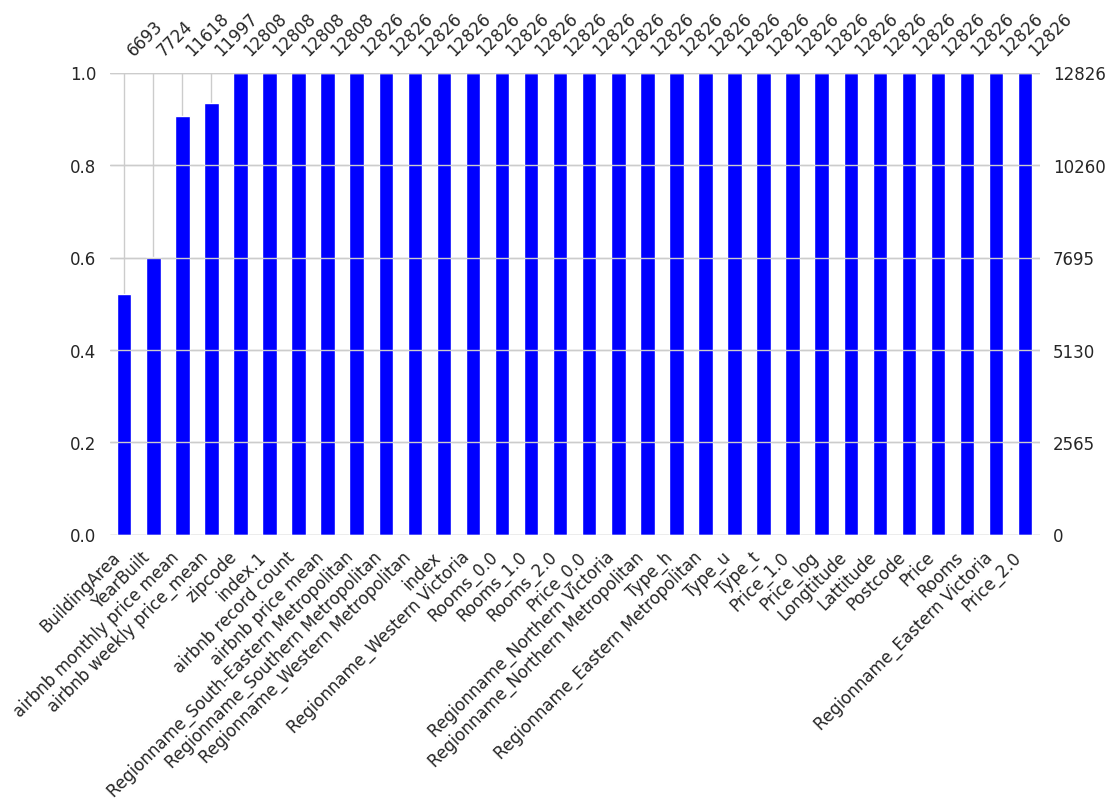

In [ ]:
import missingno as msno
msno.bar(new_table,figsize=(12, 6), sort="ascending",fontsize=12, color='blue') 

#color='steelblue')
#color="dodgerblue")
#color="tab:green")

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = new_table.copy(deep = True)

print(melb_data_mice.dtypes)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
     melb_data_mice[['YearBuilt', 'BuildingArea']])

index                                      int64
Rooms                                      int64
Price                                    float64
Postcode                                 float64
BuildingArea                             float64
YearBuilt                                float64
Lattitude                                float64
Longtitude                               float64
index.1                                  float64
zipcode                                  float64
airbnb price mean                        float64
airbnb record count                      float64
airbnb weekly price_mean                 float64
airbnb monthly price mean                float64
Price_log                                float64
Type_h                                   float64
Type_t                                   float64
Type_u                                   float64
Regionname_Eastern Metropolitan          float64
Regionname_Eastern Victoria              float64
Regionname_Northern 

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación. También se contrasta la distribución del año de construcción tanto para los datos originales con entradas nulas, y tras la imputación. Puede advertirse que la imputación se concentra en la porción de la trayectoria original de valores donde hay escasez (entre 1975 y 2000). Los datos originales tienen forma bimodal y muta a unimodal tras imputación. 

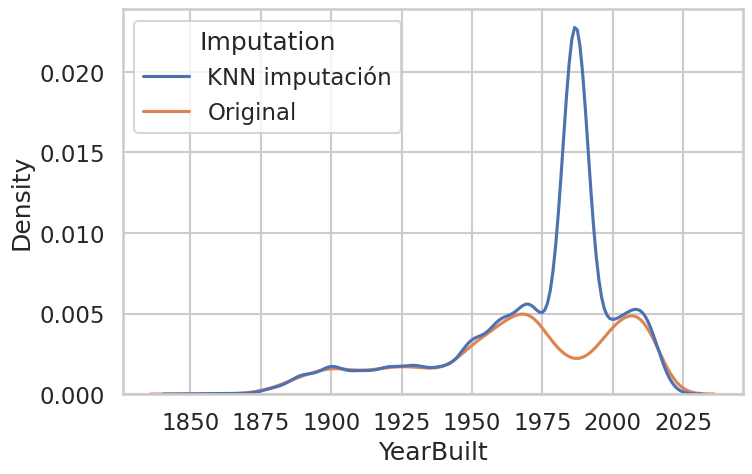

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN imputación' #agrego esta columna
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original' #agrego esta columna 


data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')


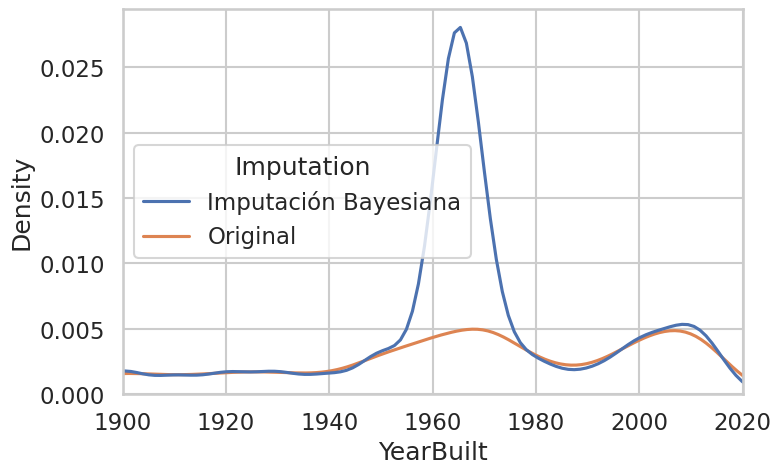

In [ ]:
from sklearn.linear_model import BayesianRidge
melb_data_mice2 = new_table.copy(deep = True)

#Ahora implementamos otro método de imputación, el cual fue visto en clase
mice_imputer = IterativeImputer(random_state=0, estimator= BayesianRidge())
melb_data_mice2[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice2[['YearBuilt','BuildingArea']])

mice_year_built = melb_data_mice2.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'Imputación Bayesiana' #agrego esta columna
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original' #agrego esta columna 

data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
plt.xlim(1900, 2020)
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

Notamos que el método Bayesiano difiere del KNN. La distribución continúa siendo bimodal, sesgándose la imputación en la década del 60. A continuación, comparamos a través de estadísticos sintéticos las resultantes de ambos métodos. El año promedio de imputación en KNN es 1985, reduciéndose en 20 años para el método Bayesiano. La inspección de extremos arroja valores coherentes para KNN (2010 el máximo) y errónes según método Bayesiano (2059). 

               KNN     Bayesian
count  5102.000000  5102.000000
mean   1985.701215  1965.033057
std       6.440773     1.566439
min    1913.400000  1963.047774
25%    1986.800000  1964.985238
50%    1986.800000  1964.985238
75%    1986.800000  1964.985238
max    2010.400000  2059.377742


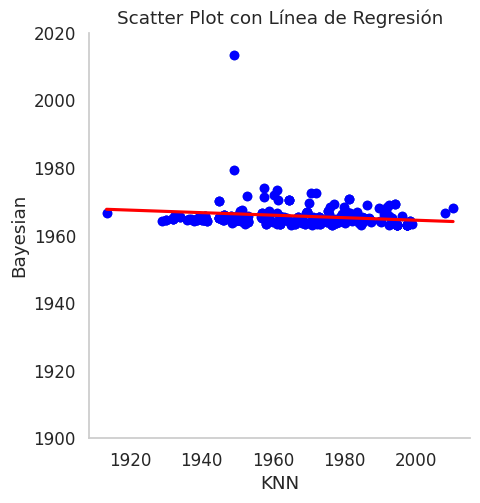

In [ ]:
# Filtrar las filas donde melb_df.YearBuilt es NaN
nan_rows = new_table['YearBuilt'].isna()

# Filtrar las correspondientes filas en melb_data_mice y melb_data_mice2
filtered_mice = melb_data_mice.YearBuilt[nan_rows]
filtered_mice2 = melb_data_mice2.YearBuilt[nan_rows]
imputados = pandas.concat([filtered_mice, filtered_mice2], axis=1, keys=['KNN', 'Bayesian'])

#Despliego tabla sintética, incluyendo los famosos 5 números de Fisher para describir 
#de forma sucinta la distribución de valores según cada método de imputación
print(imputados.describe())

# Crear el scatter plot con línea de regresión
# Este gráfico demuestra además que no hay una relación directa entre las imputaciones,
# no siendo robustos los resultados obtenidos
seaborn.set(font_scale=1.1)  # Ajustar el tamaño de letra
seaborn.set_style("whitegrid")


seaborn.lmplot(x='KNN', y='Bayesian', data=imputados, ci=None, line_kws={'color': 'red'})
plt.scatter(imputados['KNN'], imputados['Bayesian'], color='blue')

plt.xlabel('KNN')
plt.ylabel('Bayesian')
plt.title('Scatter Plot con Línea de Regresión')
plt.ylim(1900, 2020)

plt.grid(False)

plt.show()

In [ ]:
# Corrobaramos la ausencia de relación directa entre ambos conjuntos de valores imputados a través 
# del coeficiente de correlación. Aquí, incluso, es significativa la relación inversa  

from scipy.stats import pearsonr

# Calcular coeficiente de correlación y valor p
corr, p_value = pearsonr(x=imputados.KNN, y=imputados.Bayesian)

# Imprimir resultados
print("Coeficiente de correlación:", corr)
print("Valor p:", p_value)

Coeficiente de correlación: -0.15343812357946573
Valor p: 2.9779031557616995e-28


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
# Vamos a trabajar con variables numéricas sin valores nulos
numerical_cols = melb_data_mice.select_dtypes(include=['number']).columns.tolist()

numerical_cols_no_null = [col for col in numerical_cols if melb_data_mice[col].notnull().all()]
# Qué hicimos arriba? 
# La línea col for col in numerical_cols if melb_data_mice[col].notnull().all() es una comprensión de lista 
# que filtra las columnas numéricas de numerical_cols para incluir solo aquellas columnas en las que
# todas las filas no sean nulas en el DataFrame melb_data_mice.

# Imprimir la lista de columnas numéricas sin valores nulos
print(numerical_cols_no_null)

# Removemos el índice y el postcode de esa lista por ser intrascendentes 
# Quitamos también price y price_log
numerical_cols_no_null.remove('index')
numerical_cols_no_null.remove('Postcode')
numerical_cols_no_null.remove('Price')
numerical_cols_no_null.remove('Price_log')
print(numerical_cols_no_null) #chequeo todo ok

parapca = numpy.asarray(melb_data_mice[numerical_cols_no_null])
melb_data_mice[numerical_cols_no_null].describe()
# Procedemos a pre-procesar la matriz porque las variables no son comparables 
# en sus escalas de medición. Optamos por el procedimiento min-max
# La estandarización es otra opción y es más adecuada cuando las variables tienen diferentes escalas o varianzas,
# y se desea eliminar el sesgo debido a las escalas de las variables. El escalado Min-Max es más adecuado cuando se desea mantener la relación proporcional 
# entre las variables originales y se requiere que todas las variables estén en un rango específico, en nuestro caso polarizado entre -1 y 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_parapca = scaler.fit_transform(parapca)
#Chequeamos estar contenidos los datos en el rango pre-establecido
numpy.max(scaled_parapca), numpy.min(scaled_parapca)


['index', 'Rooms', 'Price', 'Postcode', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Price_log', 'Type_h', 'Type_t', 'Type_u', 'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria', 'Rooms_0.0', 'Rooms_1.0', 'Rooms_2.0', 'Price_0.0', 'Price_1.0', 'Price_2.0']
['Rooms', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Type_h', 'Type_t', 'Type_u', 'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria', 'Rooms_0.0', 'Rooms_1.0', 'Rooms_2.0', 'Price_0.0', 'Price_1.0', 'Price_2.0']


(1.0, -1.0)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(scaled_parapca)
proyected_features = pca.transform(scaled_parapca)
proyected_features.shape

(12826, 20)

[0.32248853 0.50833821 0.6324664  0.727023   0.79711183 0.8552718
 0.90924404 0.94152228 0.96096743 0.97452575 0.98622086 0.9914336
 0.99407427 0.9964976  0.99805243 0.99925564 0.9999266  1.
 1.         1.        ]


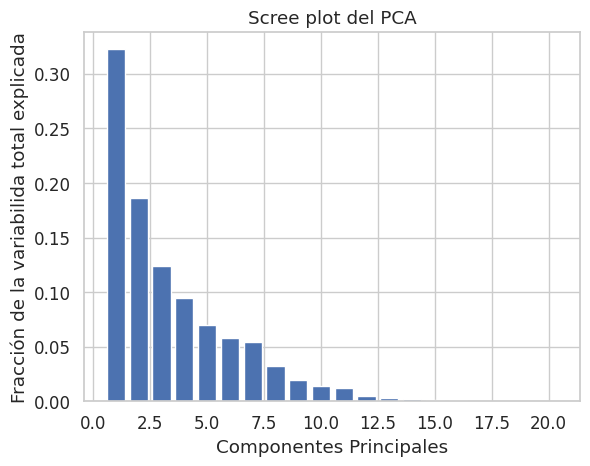

In [ ]:
varexplicada = pca.explained_variance_ratio_
# Plot the variance explained by each component
plt.bar(range(1, len(varexplicada) + 1), varexplicada)
plt.xlabel('Componentes Principales')
plt.ylabel('Fracción de la variabilida total explicada')
plt.title('Scree plot del PCA')
print(varexplicada.cumsum())
plt.show()


En el contexto del análisis de componentes principales (PCA), un screeplot es un gráfico que muestra la varianza explicada por cada componente principal. En el eje x del gráfico se representan los números de los componentes principales, mientras que en el eje y se muestra la varianza explicada. El screeplot ayuda a visualizar la contribución relativa de cada componente principal en la explicación de la varianza total de los datos. Al observar los valores de suma acumulada de varianza, conlcuimos que los dos primeros componentes dan cuenta del 50% de la variabilidad total contenida en los datos.

<Figure size 1000x1000 with 0 Axes>

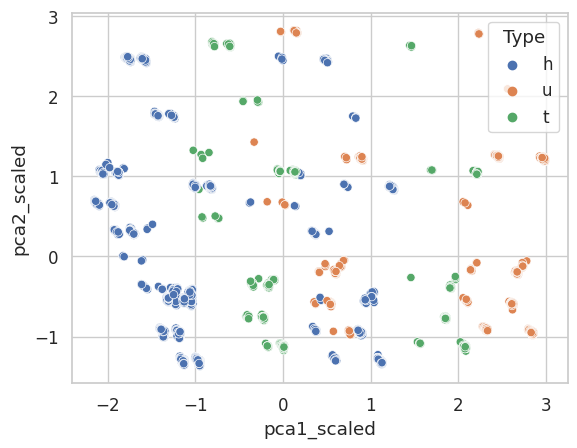

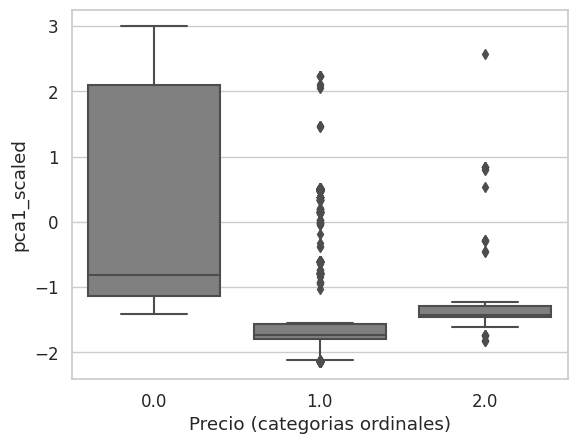

In [ ]:
#agrego los 2 componentes
melb_data_mice[['pca1_scaled', 'pca2_scaled']] = pandas.DataFrame(proyected_features[:, :2])
melb_data_mice['Type'] = melb_df.Type
data = melb_data_mice[melb_data_mice.Price < 2000000].sample(1000)
fig = plt.figure(figsize=(10, 10))
plt.figure()
seaborn.scatterplot(data=melb_data_mice, x='pca1_scaled', y='pca2_scaled',
                     hue='Type')  # 'Landsize' 'Price' 'YearBuilt'
plt.figure()
seaborn.boxplot(x = discretized_cols.Price, y = melb_data_mice.pca1_scaled, color='#808080')
plt.xlabel('Precio (categorias ordinales)')
plt.show()
#Este último gráfico simplemente para mostrar que los mayores precios, como
#las viviendas h se localizan en el lado negativo del primer eje del PCA

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
# guardamos en el drive la base arriba generada. Durante el proceso de codificación se tuvo presente 
# conservar nombres de columnas, por lo cual no hace falta realizar nuevos pasos
melb_data_mice.info()
with open(path, 'w') as f:
  melb_data_mice.to_csv(f, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12826 entries, 0 to 12825
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  12826 non-null  int64  
 1   Rooms                                  12826 non-null  int64  
 2   Price                                  12826 non-null  float64
 3   Postcode                               12826 non-null  float64
 4   BuildingArea                           12826 non-null  float64
 5   YearBuilt                              12826 non-null  float64
 6   Lattitude                              12826 non-null  float64
 7   Longtitude                             12826 non-null  float64
 8   index.1                                12808 non-null  float64
 9   zipcode                                12808 non-null  float64
 10  airbnb price mean                      12808 non-null  float64
 11  ai

Retenemos esta pieza de código para poder recurrir al mismo en otros escenarios de análisis. Lo bloqueamos con almohadillas de todas formas

In [ ]:
# ## Small example
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import OneHotEncoder

# ## If we process our data with the following steps:
# categorical_cols = ['Type', 'Regionname']
# numerical_cols = ['Rooms', 'Distance']
# new_columns = []

# # Step 1: encode categorical columns
# encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# X_cat = encoder.fit_transform(melb_df[categorical_cols])
# for col, col_values in zip(categorical_cols, encoder.categories_):
#   for col_value in col_values:
#     new_columns.append('{}={}'.format(col, col_value))
# print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# # Step 2: Append the numerical columns
# X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
# new_columns.extend(numerical_cols)
# print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# # Step 3: Append some new features, like PCA
# pca = PCA(n_components=2)
# pca_dummy_features = pca.fit_transform(X)
# X_pca = numpy.hstack([X, pca_dummy_features])
# new_columns.extend(['pca1', 'pca2'])

# ## Re-build dataframe
# processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
# processed_melb_df.head()




## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
